In [4]:
import json
import os
import sys
import matplotlib.pyplot as plt
from datetime import datetime
from typing import *

from aizynthfinder.aizynthfinder import AiZynthFinder


def disablePrint():
    sys.stdout = open(os.devnull, 'w')


def enablePrint():
    sys.stdout = sys.__stdout__


def generate_time_tag() -> str:
    d = datetime.now()
    return d.strftime("%d%m%y_%H%M")


def setup_finder(config_path: str = "../data/config.yml"):
    finder = AiZynthFinder(config_path)
    finder.stock.select("zinc")
    finder.expansion_policy.select("uspto")
    finder.filter_policy.select("uspto")
    return finder


def load_smiles(smiles_path: str) -> List[str]:
    print(f"Loading SMILES from '{smiles_path}'.")
    with open(smiles_path, mode="r", encoding="utf-8") as f:
        smiles_list = [smiles for smiles in f.read().split("\n")]
    print(f"Loaded {len(smiles_list)} SMILES.")
    return smiles_list


def experiment_with_C(finder: AiZynthFinder, C_values: List[float],
                      smiles_path: str = "../data/smiles_list.txt") -> Dict[float, List[Dict[str, str]]]:
    smiles_list = load_smiles(smiles_path)
    result_dict = {}
    for C in C_values:
        finder.config.C = C
        print(f"Running finder with C set to {finder.config.C}.")
        stats_list = process_smiles_list(finder, target_smiles=smiles_list)
        result_dict[C] = stats_list
    return result_dict


def process_smiles_list(finder: AiZynthFinder, target_smiles: List[str]) -> List[Dict[str, str]]:
    stats_list: List[Dict[str, str]] = []
    for smiles in target_smiles:
        finder.target_smiles = smiles
        finder.tree_search(show_progress=True)
        finder.build_routes()
        stats_list.append(finder.extract_statistics())
    return stats_list


# TODO: Rename to get_nodes_for_smiles or something in that direction
def get_smiles_routes(finder: AiZynthFinder, target_smiles: List[str]) -> List[Dict[str, str]]:
    routes = []
    for smiles in target_smiles:
        finder.target_smiles = smiles
        finder.tree_search(show_progress=True)
        finder.build_routes()
        routes.append(finder.analysis.sort_nodes(min_return=2, max_return=3))
    return routes


def main(verbose=False):
    if not verbose:
        disablePrint()

    finder = setup_finder()

    time_tag = generate_time_tag()

    C_values = [0.8, 1.0, 1.2, 1.4, 1.6]
    result_dict = experiment_with_C(finder=finder, C_values=C_values)

    with open(f"../data/result_dict_json_{time_tag}.json", mode="w", encoding="utf-8") as json_file:
        json.dump(result_dict, json_file)
    
#     enablePrint()
        

def main2(verbose=False):
    if not verbose:
        disablePrintlePrint()
        
    finder = setup_finder()
    
    smiles_path = "../data/smiles_list.txt"
    routes = get_smiles_routes(finder=finder, target_smiles=load_smiles(smiles_path))
    
    return routes
    
#     enablePrint()
    

In [2]:
main(verbose=True)

  0%|          | 0/100 [00:00<?, ?it/s]

Loading SMILES from '../data/smiles_list.txt'.
Loaded 5 SMILES.
Running finder with C set to 0.8.


  4%|▍         | 4/100 [00:00<00:03, 30.91it/s]  

Running finder with C set to 1.0.


  4%|▍         | 4/100 [00:00<00:03, 30.83it/s]  

Running finder with C set to 1.2.


  3%|▎         | 3/100 [00:00<00:03, 29.22it/s]  

Running finder with C set to 1.4.


  4%|▍         | 4/100 [00:00<00:03, 30.19it/s]  

Running finder with C set to 1.6.


In [5]:
routes = main2(verbose=True)

  0%|          | 0/100 [00:00<?, ?it/s]

Loading SMILES from '../data/smiles_list.txt'.
Loaded 5 SMILES.


In [6]:
# Do stuff with routes here, e.g. pickle the Node list?

import pickle

with open('../data/retro_states.pkl', 'wb') as f:
    pickle.dump(routes, f)

AttributeError: Can't pickle local object 'Layer.add_loss.<locals>._tag_callable'

In [7]:
routes

[([<aizynthfinder.mcts.node.Node at 0x7fb627928070>,
  [0.9976287063411217, 0.9976287063411217, 0.9976287063411217]),
 ([<aizynthfinder.mcts.node.Node at 0x7fb628197c40>,
  [0.7659601461011059, 0.7623712936588783, 0.7623712936588783]),
 ([<aizynthfinder.mcts.node.Node at 0x7fb68c178a60>,
  [0.9976287063411217, 0.9976287063411217, 0.9976287063411217]),
 ([<aizynthfinder.mcts.node.Node at 0x7fb6349228b0>,
  [0.975, 0.9634470710684997, 0.9634470710684997]),
 ([<aizynthfinder.mcts.node.Node at 0x7fb634346670>,
  [0.8372101461011058, 0.8372101461011058])]

In [9]:
# json

{'0.8': [{'target': 'CC(=O)Nc1ccc(O)cc1',
   'search_time': 13.141473531723022,
   'first_solution_time': 3.0831737518310547,
   'first_solution_iteration': 1,
   'number_of_nodes': 73,
   'max_transforms': 7,
   'max_children': 26,
   'number_of_routes': 34,
   'number_of_solved_routes': 29,
   'top_score': 0.9976287063411217,
   'is_solved': True,
   'number_of_steps': 1,
   'number_of_precursors': 2,
   'number_of_precursors_in_stock': 2,
   'precursors_in_stock': 'CC(=O)OC(C)=O, Nc1ccc(O)cc1',
   'precursors_not_in_stock': '',
   'policy_used_counts': {'uspto': 72}},
  {'target': 'CCNC(=O)[C@H]1O[C@@H](n2cnc3c(N)nc(NCCc4ccc(CCC(=O)O)cc4)nc32)[C@H](O)[C@@H]1O',
   'search_time': 105.41343235969543,
   'first_solution_time': 0,
   'first_solution_iteration': 0,
   'number_of_nodes': 788,
   'max_transforms': 7,
   'max_children': 29,
   'number_of_routes': 124,
   'number_of_solved_routes': 0,
   'top_score': 0.7659601461011059,
   'is_solved': False,
   'number_of_steps': 6,
   'num

# Discussion points for MSc Thesis 25/06/2021

- Mini experiments are done, plotting shows that a higher C value is not necessarily better, as in some cases (e.g. dextromoramide, 4th plot), a higher C param actually resolted in a lower number of solved routes. Cases like these may be interesting to look into further. Maybe some structures are just more convenient to exploit.
<br>
<br>
- We can also peek into the state of certain nodes to see what the internals of the tree look like. Following this, we can also straightforwardly request multiple results from the MCTS search with AiZynthFinder, so this does not need to be implemented manually.
<br>
<br>
- I want to take my time a bit more with the thesis to make sure I'm satisfied with my work, so should I look into asking to graduate later than August? (i.e. not applying for graduation before July 1st).
<br>
<br>
- I have found another paper by Thakkar et al. (no idea how I missed this one) called "Retrosynthetic accessibility score (RAscore)–rapidmachine learned synthesizability classification fromAI driven retrosynthetic planning†" which may be exactly what we're looking for to incorporate into the meta-loop of DrugEx. If it's okay for me to take a bit more time with my thesis, this might be an extremely interesting approach to try out!
<br>
<br>
- I didn't read it in full detail yet as I just found it a few hours ago, but essentially the AiZynthFinder people trained a model on their previous results to be able to very quickly predict a RA-score (Retrosynthetic Accessibility) which in the abstract is stated to be a x4500 speedup than the underlying CASP tool (AiZynthFinder). This should definitely be viable in the training loop for DrugEx!
<br>
<br>
- Rerun main2() if we want to look at the node's internal state (plus visuals). Not sure if node list was pickled correctly.

In [68]:
def plot_results(path_to_result_json:str, variable_to_plot:str="number_of_solved_routes"):
    with open(path_to_result_json, mode="r", encoding="utf-8") as f:
        results = json.load(f)
        for i in range(len(results)):
            assert len(results) == 5
            x = [results[k][i][variable_to_plot] for k, _ in results.items()]
            plt.plot(x)
            plt.show()

[29, 29, 29, 29, 29]


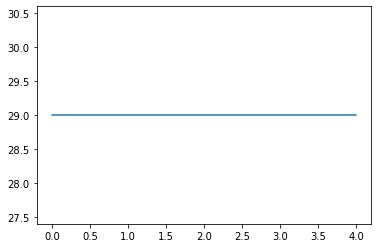

[0, 0, 0, 0, 0]


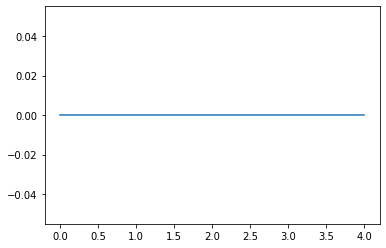

[18, 18, 18, 19, 19]


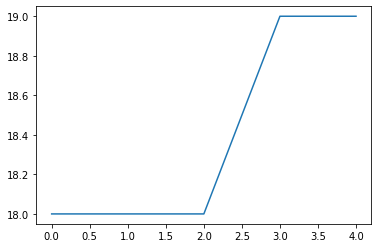

[6, 6, 4, 4, 4]


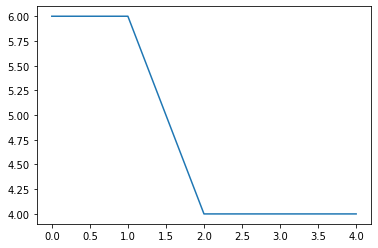

[0, 0, 0, 0, 0]


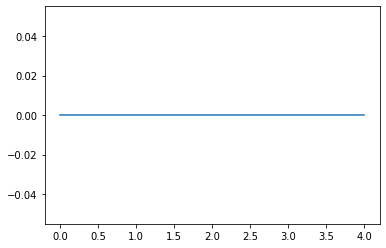

In [73]:
plot_results("../data/result_dict_json_250621_0535.json", variable_to_plot="number_of_solved_routes")

In [77]:
# I think something went wrong while pickling
with open("../data/retro_states.pkl", mode="rb") as pkl:
    node_list = pickle.load(pkl)

EOFError: Ran out of input